In [4]:
import pandas as pd
Har = pd.read_csv("StudentsPerformance (1).csv")
Har.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
Har.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    le = LabelEncoder()
    Har[col] = le.fit_transform(Har[col])
Har.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


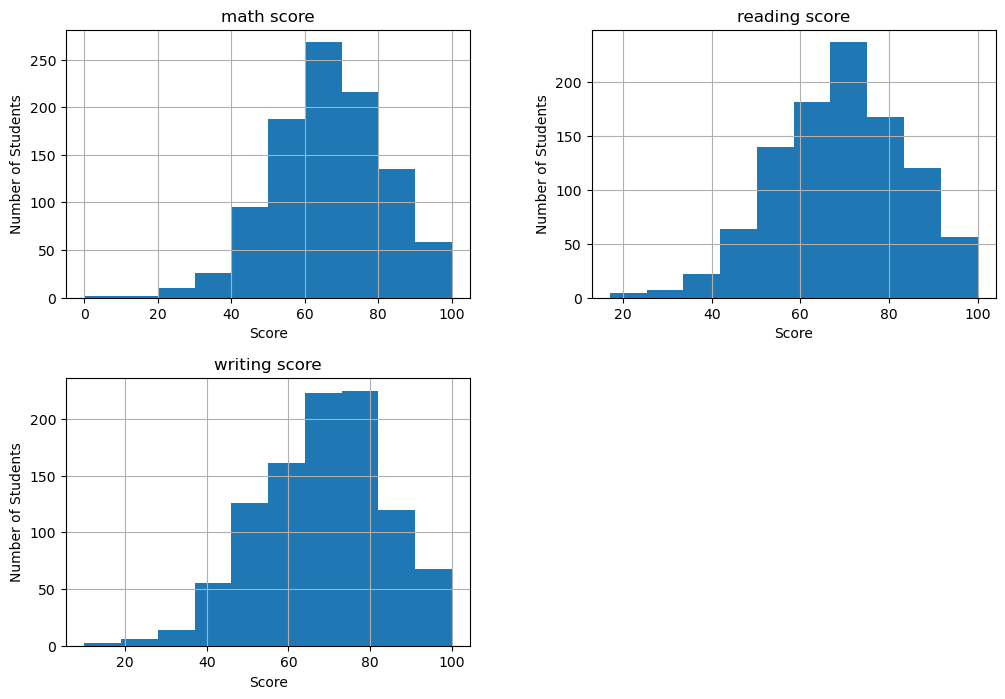

In [9]:
Histogram=Har[['math score' , 'reading score' , 'writing score']].hist(bins=10,figsize=(12,8))

for chart in Histogram.flatten():
    chart.set_xlabel("Score")
    chart.set_ylabel("Number of Students")

In [10]:
print("Average Scores by gender")
print(Har.groupby('gender')[['math score' , 'reading score' , 'writing score']].mean())
print("\n")

print("Average scores by Lunch type:")
print(Har.groupby('lunch')[['math score' , 'reading score' , 'writing score']].mean())
print("\n")

print("Average score by test preparation status")
print(Har.groupby('test preparation course')[['math score' , 'reading score' , 'writing score']].mean())

Average Scores by gender
        math score  reading score  writing score
gender                                          
0        63.633205      72.608108      72.467181
1        68.728216      65.473029      63.311203


Average scores by Lunch type:
       math score  reading score  writing score
lunch                                          
0       58.921127      64.653521      63.022535
1       70.034109      71.654264      70.823256


Average score by test preparation status
                         math score  reading score  writing score
test preparation course                                          
0                         69.695531      73.893855      74.418994
1                         64.077882      66.534268      64.504673


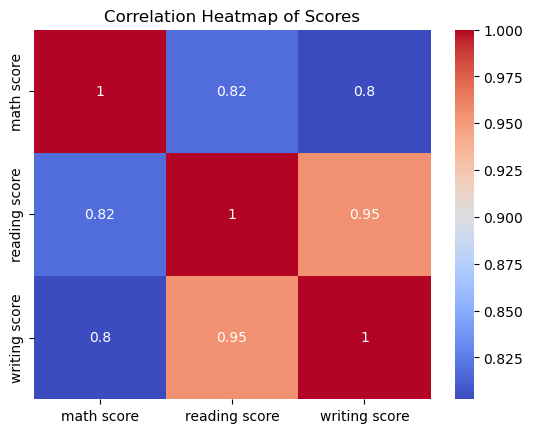

In [11]:
import seaborn as sns
score_data = Har[['math score', 'reading score', 'writing score']]
sns.heatmap(score_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Scores")
plt.show()


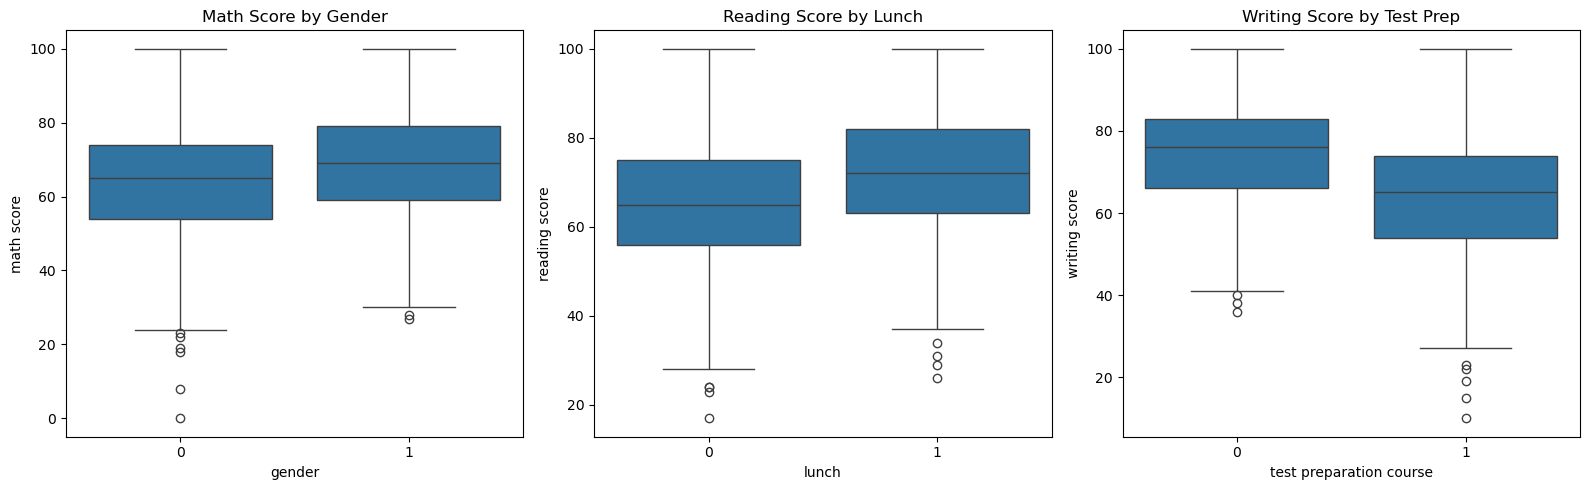

In [14]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=Har)
plt.title("Math Score by Gender")

plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='reading score', data=Har)
plt.title("Reading Score by Lunch")

plt.subplot(1, 3, 3)
sns.boxplot(x='test preparation course', y='writing score', data=Har)
plt.title("Writing Score by Test Prep")

plt.tight_layout()
plt.show()

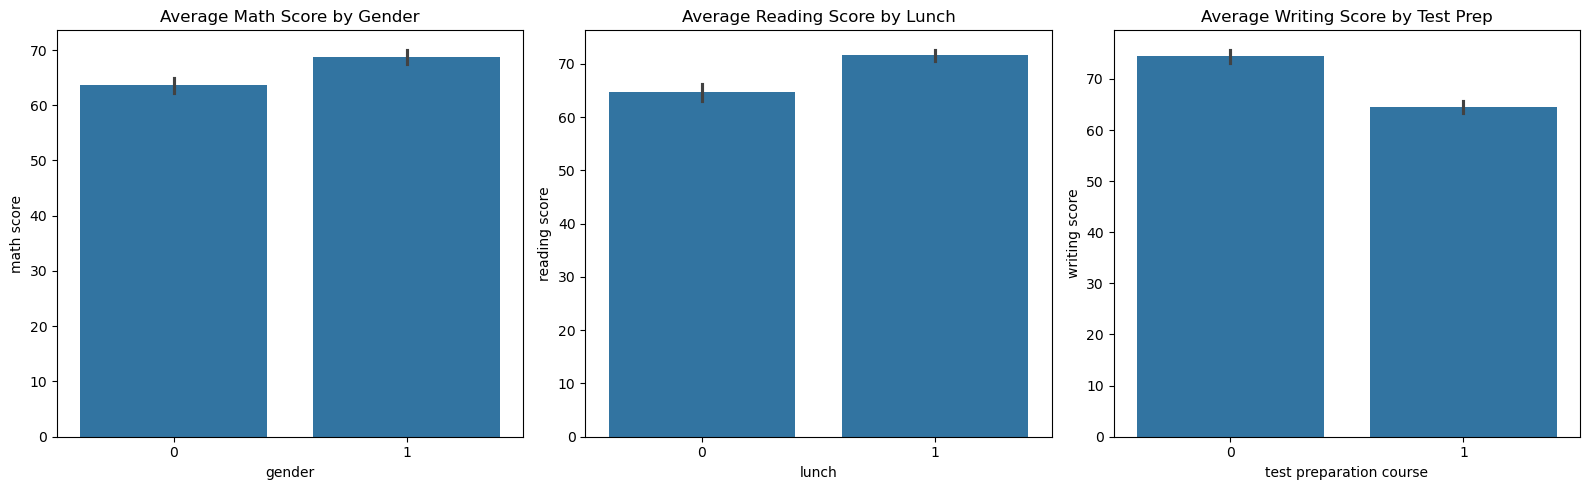

In [15]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='gender', y='math score', data=Har)
plt.title("Average Math Score by Gender")

plt.subplot(1, 3, 2)
sns.barplot(x='lunch', y='reading score', data=Har)
plt.title("Average Reading Score by Lunch")

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course', y='writing score', data=Har)
plt.title("Average Writing Score by Test Prep")

plt.tight_layout()
plt.show()

In [32]:
Har["average_score"] = Har[['math score' , 'reading score' , 'writing score']].mean(axis=1)
Har["result"] = Har["average_score"].apply(lambda x: 'Pass' if x >=50 else 'Fail')
from sklearn.preprocessing import LabelEncoder
le_rlt = LabelEncoder()
Har["result"] = le_rlt.fit_transform(Har["result"])
Har.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,result
0,0,1,1,1,1,72,72,74,72.666667,1
1,0,2,4,1,0,69,90,88,82.333333,1
2,0,1,3,1,1,90,95,93,92.666667,1
3,1,0,0,0,1,47,57,44,49.333333,0
4,1,2,4,1,1,76,78,75,76.333333,1


In [50]:
X = Har[['gender', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']]
y = Har['result']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_predict,y_test)
con_matrix = confusion_matrix(y_predict,y_test)
clf_report =  classification_report(y_test, y_pred)
print(accuracy)
print(con_matrix)
print(clf_report)




0.9833333333333333
[[ 38   0]
 [  5 257]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.99      1.00      0.99       257

    accuracy                           0.99       300
   macro avg       0.99      0.97      0.98       300
weighted avg       0.99      0.99      0.99       300



In [46]:

test_user = pd.DataFrame({
    'gender': [1],                  
    'lunch': [0],                   
    'test preparation course': [1],
    'math score': [68],
    'reading score': [75],
    'writing score': [70]
})

prediction = model.predict(test_user)

print("Predicted result for test user:", "Pass" if prediction[0] == 1 else "Fail")


Predicted result for test user: Pass


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
con_matrix =  confusion_matrix(y_test, y_pred)
clf_report =  classification_report(y_test, y_pred)
print(accuracy)
print(con_matrix)
print(clf_report)

0.9866666666666667
[[ 39   4]
 [  0 257]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.98      1.00      0.99       257

    accuracy                           0.99       300
   macro avg       0.99      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300



In [53]:
test_user = pd.DataFrame({
    'gender': [0],
    'lunch': [0],
    'test preparation course': [0],
    'math score': [20],
    'reading score': [29],
    'writing score': [33]
})

test_prediction = knn.predict(test_user)
print("Predicted result for test user:", "Pass" if test_prediction[0] == 1 else "Fail")


Predicted result for test user: Fail


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


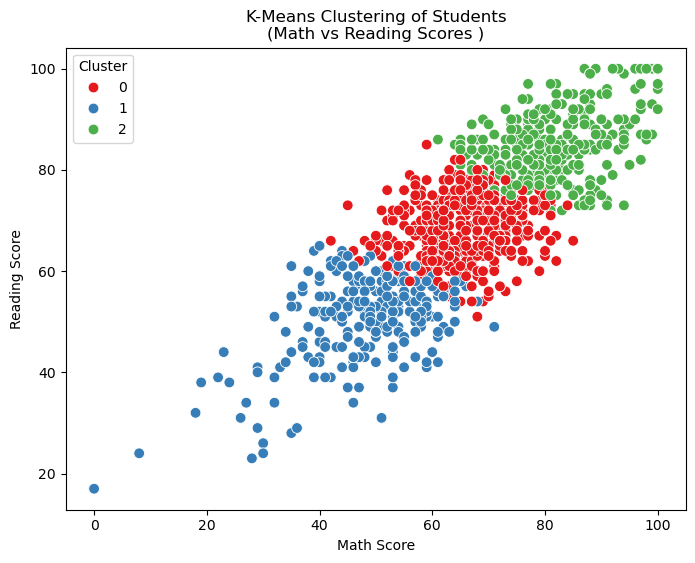

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scores = Har[['math score', 'reading score', 'writing score']]

scaler = StandardScaler()
scores_scaled = scaler.fit_transform(scores)

kmeans = KMeans(n_clusters=3, random_state=42)
Har['cluster'] = kmeans.fit_predict(scores_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='math score',
    y='reading score',
    hue='cluster',
    palette='Set1',
    data=Har,
    s=60
)
plt.title('K-Means Clustering of Students\n(Math vs Reading Scores )')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Cluster')
plt.show()



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


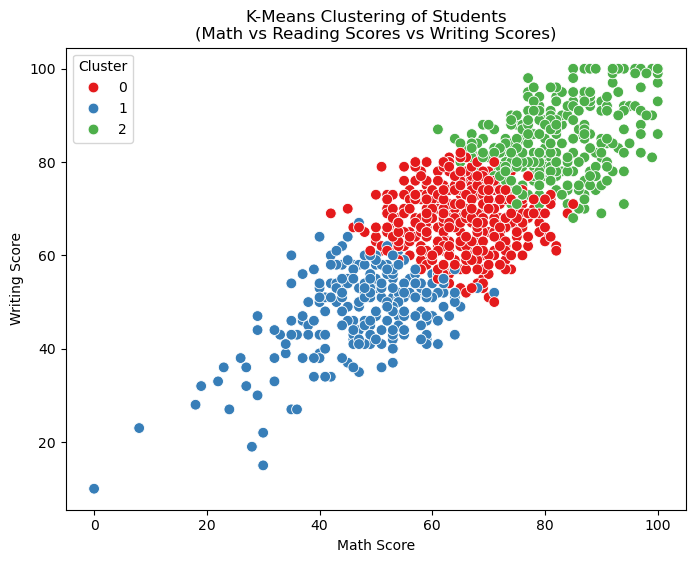

In [62]:

scores = Har[['math score', 'reading score', 'writing score']]

scaler = StandardScaler()
scores_scaled = scaler.fit_transform(scores)

kmeans = KMeans(n_clusters=3, random_state=42)
Har['cluster'] = kmeans.fit_predict(scores_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='math score',
    y='writing score',
    hue='cluster',
    palette='Set1',
    data=Har,
    s=60
)
plt.title('K-Means Clustering of Students\n(Math vs Reading Scores vs Writing Scores)')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.legend(title='Cluster')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


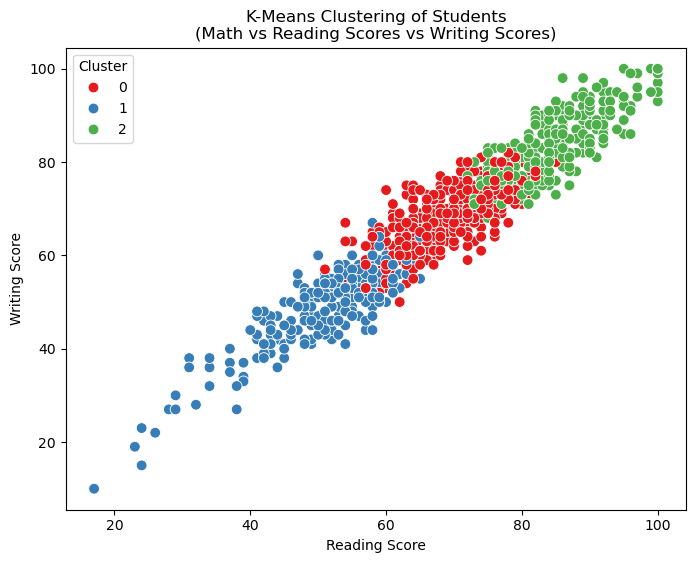

In [63]:
scores = Har[['math score', 'reading score', 'writing score']]

scaler = StandardScaler()
scores_scaled = scaler.fit_transform(scores)

kmeans = KMeans(n_clusters=3, random_state=42)
Har['cluster'] = kmeans.fit_predict(scores_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='reading score',
    y='writing score',
    hue='cluster',
    palette='Set1',
    data=Har,
    s=60
)
plt.title('K-Means Clustering of Students\n(Math vs Reading Scores vs Writing Scores)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend(title='Cluster')
plt.show()

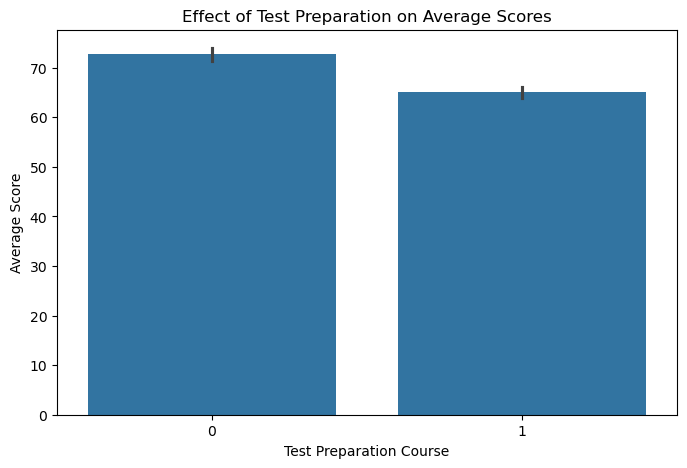

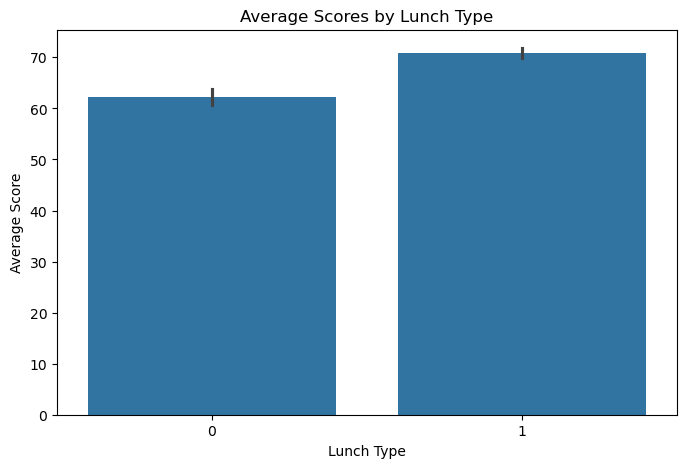

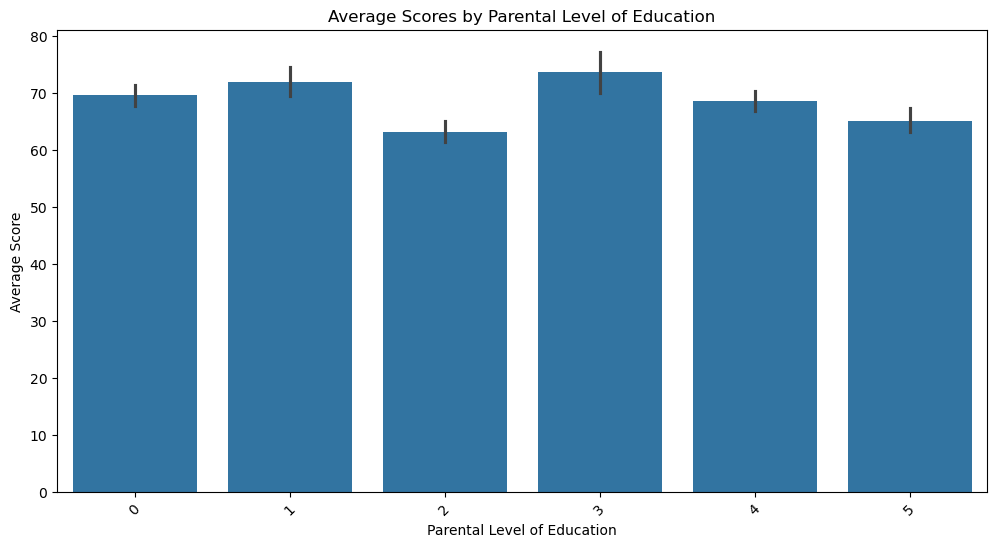

In [64]:

plt.figure(figsize=(8, 5))
sns.barplot(
    x='test preparation course', 
    y='average_score', 
    data=Har)
plt.title('Effect of Test Preparation on Average Scores')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='lunch',
    y='average_score',
    data=Har)
plt.title('Average Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='parental level of education',
    y='average_score',
    data=Har)
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()
